In [1]:
# ignore this cell (it's just to make certain text red later, but you don't need to understand it).
from IPython.core.display import display, HTML
display(HTML('<style>em { color: red; }</style> <style>.container { width:100% !important; }</style>'))

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib
from matplotlib import pyplot as plt
import random

In [ ]:
%matplotlib inline

In [ ]:
matplotlib.rcParams["font.size"] = 15

# Stock Market Example

In [4]:
df = pd.read_csv("sp500.csv")
df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


### How do we compute *total gain* for *every year*?

In [5]:
df["total"] = df["return"].cumprod()
df.head()

,year,return,total
47,2017,1.2183,122.296742
48,2018,0.9557,116.878996
49,2019,1.3149,153.684192
50,2020,1.1840,181.962083
51,2021,1.1059,201.231868


In [ ]:
df.tail()

### Assuming you initally invested *1000 dollars in 1970*, what is your *total wealth* in every future year?

In [6]:
starting = 1000
df["wealth"] = df["total"] * starting
df.tail()

,year,return,total,wealth
47,2017,1.2183,122.296742,122296.741896
48,2018,0.9557,116.878996,116878.996230
49,2019,1.3149,153.684192,153684.192143
50,2020,1.1840,181.962083,181962.083497
51,2021,1.1059,201.231868,201231.868140


### How do we create a *line plot* to plot *wealth gain* over the years?

Text(0, 0.5, 'Total wealth ($)')

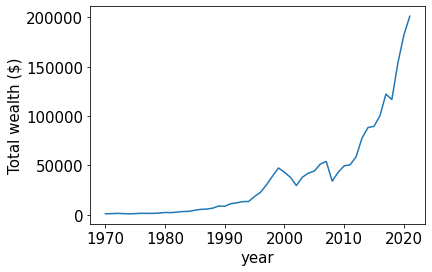

In [7]:
ax = df.set_index("year")["wealth"].plot.line()
ax.set_ylabel("Total wealth ($)")

### Random simulation
- random.choice
- random.choices

In [8]:
random.choice([3, 5, 9]) 

9

In [9]:
random.choices([3, 5, 9], k = 10) # sampling with replacement

[5, 5, 5, 5, 9, 3, 5, 9, 5, 5]

### How risky is it in investing in SP500 index going forward?
### Approach:
1. Run simulation, randomly replaying past years.
2. Run hundreds of simulations, explore range of outcomes.

In [10]:
# Step 1
def run_sim(years = 10, starting = 1000):
    rand_returns = random.choices(df["return"], k = years)
    rand_returns = Series(rand_returns)
    rand_returns = rand_returns.cumprod() * starting
    return rand_returns

In [ ]:
# Step 2
def run_n_sims(n, years = 10, starting = 1000):
    sims = pd.DataFrame()
    for i in range(n):
        sims["sim" + str(i)] = run_sim(years = 10, starting = 1000) 
    return sims

### For *10 years*, run *50 simulations*

In [11]:
sims = run_n_sims(50)
sims.tail()

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim40,sim41,sim42,sim43,sim44,sim45,sim46,sim47,sim48,sim49
5,1531.733706,2507.094697,2280.067631,1389.068915,1695.348514,1388.787422,2418.831490,1266.339193,2389.868915,3025.247717,...,1382.294976,3021.046442,2222.122959,1827.609653,2837.694141,3480.397107,1631.059763,1400.218723,1569.109618,1425.701266
6,1552.871632,2982.941270,2644.878452,1021.382373,1573.622491,1345.735012,2764.966276,1447.552332,3166.576312,4008.453226,...,1684.049970,3594.441057,2251.454982,1927.945422,3376.288489,3230.504595,1738.057283,1665.980236,1739.828745,898.191798
7,1574.301260,3391.305930,1666.273425,1132.508776,1595.338481,1701.816496,3557.958604,1467.528554,4344.542700,4872.274896,...,2316.915948,4276.665969,2983.177851,1214.605616,3447.528176,4432.252304,2117.475188,1833.911044,2014.547704,1135.853348
8,2073.197329,3933.914879,1584.292772,1206.801351,1860.324203,1649.060184,3983.490453,1615.455432,5793.882144,4721.234374,...,2979.090526,4511.454931,3102.803283,1346.754707,4020.162606,5249.559629,2256.381561,1859.219017,2233.730494,1210.365327
9,2209.199074,4091.664866,2083.186566,1255.194085,1172.004248,2042.196132,5312.382869,1913.345414,3650.145751,6296.238161,...,3629.425988,6016.476296,4079.876036,1449.377416,4978.569371,6913.145076,2380.256908,2461.420056,2570.130306,1066.452890


## How do you become a successful Data Scientist?
- By learning how to play both the detective and the lawyer

### How do we create a *line plot* to visualize all of the simulations?
- Be the detective

<AxesSubplot:>

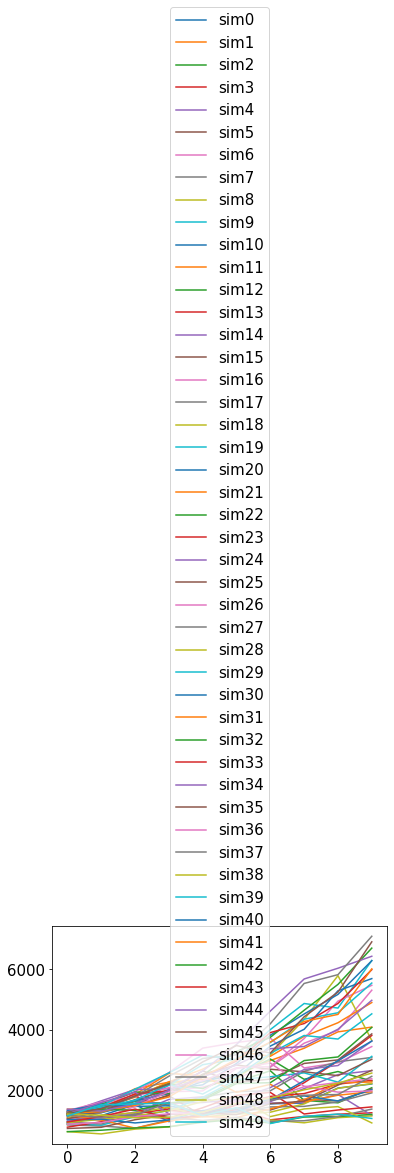

In [12]:
sims.plot.line()

<AxesSubplot:>

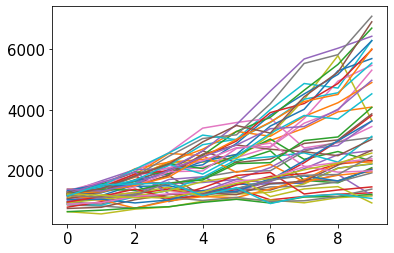

In [13]:
sims.plot.line(legend = False)

### How do we create a *line plot* to present *statistics* of all of the simulations?
- Be the lawyer

### For *10 years*, run *250 simulations*

In [14]:
sims = run_n_sims(250)
sims.tail()

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim240,sim241,sim242,sim243,sim244,sim245,sim246,sim247,sim248,sim249
5,2150.238718,565.729584,1002.619357,1817.279853,2446.541034,1519.607145,1064.664948,1389.900044,2362.052828,1426.765807,...,1072.317290,2109.597567,1241.144651,1422.144662,3018.550303,765.576023,1840.647585,775.520327,1899.504016,2180.152344
6,2407.407268,588.415341,1051.847967,2500.213621,2574.984439,2026.548088,1107.358012,1445.635035,2257.413888,1902.734880,...,1024.813634,2016.142395,1634.959849,1956.586626,3699.535252,731.661005,2242.460953,899.603579,1726.649151,2287.197824
7,2288.962831,686.151129,1248.227983,2664.227635,2736.435963,2107.812667,1058.302052,1536.276352,2146.349125,1482.230471,...,1147.381345,2126.828613,1936.446446,2169.463251,3748.369117,1003.838899,3076.656427,1095.987041,2103.576660,2708.957102
8,2894.622396,604.567759,1628.563049,3245.828528,3034.160196,2445.062693,1124.657591,1746.592585,2469.589303,1502.685252,...,979.175240,1873.948691,2489.882840,2574.502039,4594.001190,1290.736056,3770.750117,1047.434815,2586.557862,3586.388308
9,3084.509625,676.874063,2156.054621,3493.160662,2231.017992,2978.819879,1378.380344,1856.103940,3397.660963,1654.155925,...,1133.787010,2142.110748,2949.017235,2834.011845,4047.774448,1475.440386,4992.096080,1387.851130,3374.682042,3730.202479


### Quantile function
- enables to calculate percentiles
- takes as argument a float value between 0 and 1
- defaults to 50th percentile

In [15]:
sims.quantile()

sim0      1981.093370
sim1       652.643386
sim2      1211.851671
sim3      1594.975697
sim4      2110.361401
             ...     
sim245    1008.819449
sim246    1620.243020
sim247     905.046352
sim248    1584.527406
sim249    1937.856676
Name: 0.5, Length: 250, dtype: float64

In [16]:
sims.quantile(0.5)

sim0      1981.093370
sim1       652.643386
sim2      1211.851671
sim3      1594.975697
sim4      2110.361401
             ...     
sim245    1008.819449
sim246    1620.243020
sim247     905.046352
sim248    1584.527406
sim249    1937.856676
Name: 0.5, Length: 250, dtype: float64

In [17]:
sims.quantile(0.7)

sim0      2324.496162
sim1       779.549937
sim2      1415.585992
sim3      2549.417826
sim4      2485.074056
             ...     
sim245    1139.449701
sim246    2492.719595
sim247    1015.377184
sim248    1960.725810
sim249    2413.725607
Name: 0.7, Length: 250, dtype: float64

### How to change *quantile* to compute percentile of *rows*?
- Using axis parameter.
- axis parameter takes a value of 0 or 1.
- axis works for many functions like mean, std, etc.,
- Default value for axis is 0, so that is column computation
- If you want row-wise computation, you will have to set axis to be 1

In [18]:
sims.quantile(0.5, axis = 1)

0    1143.100000
1    1279.684860
2    1461.892774
3    1612.901035
4    1730.236193
5    1911.124378
6    2223.092314
7    2303.828064
8    2569.977944
9    2826.803274
Name: 0.5, dtype: float64

<AxesSubplot:>

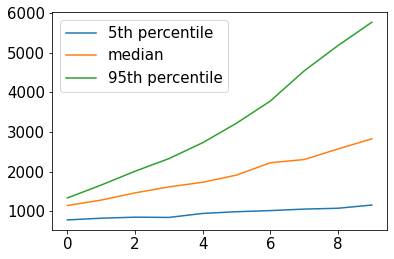

In [19]:
# .quantile
DataFrame({
    "5th percentile": sims.quantile(0.05, axis = 1),
    "median": sims.quantile(0.5, axis = 1),
    "95th percentile": sims.quantile(0.95, axis = 1)
}).plot.line()

# Bar Plot Example w/ Fire Hydrants

In [20]:
df = pd.read_csv("Fire_Hydrants.csv")
df.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


In [21]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### Let's create a *bar plot* to visualize *colors* of fire hydrants.

Text(0, 0.5, 'Fire hydrant count')

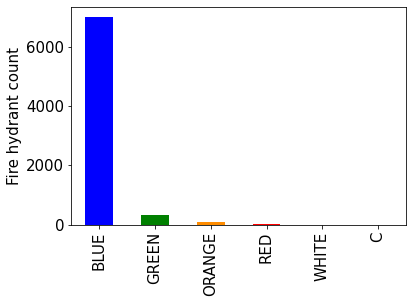

In [22]:
clean_df = df["nozzle_color"].str.upper()# How to handle clean up of the data?
ax = clean_df.value_counts().plot.bar(color=["b", "g", "darkorange", "r", "c", "0.5"]) 
# Not recommended to use same aspect of data for multiple plot aspects (x-axis and color)
ax.set_ylabel("Fire hydrant count")

### Let's create a *bar plot* to visualize *style* of fire hydrants.

<AxesSubplot:>

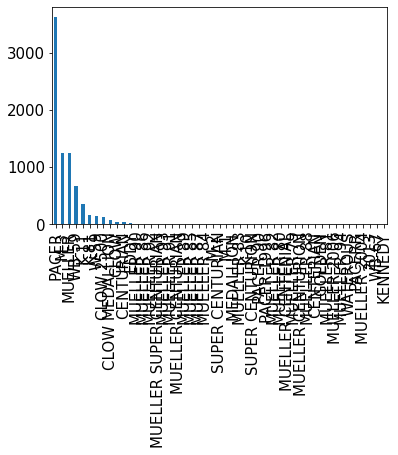

In [23]:
style_counts = df["Style"].str.upper().value_counts()
style_counts.plot.bar()

Text(0.5, 0, 'Hydrant count')

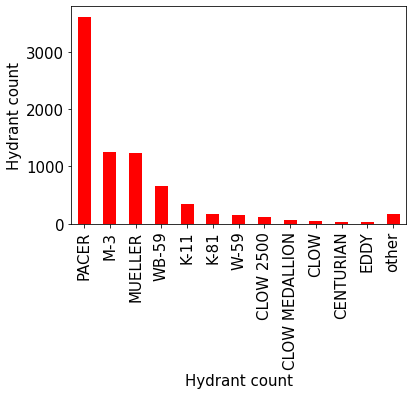

In [24]:
top12 = style_counts.iloc[:12]
top12["other"] = style_counts.iloc[12:].sum()
ax = top12.plot.bar(color="r")
ax.set_ylabel("Hydrant count")
ax.set_xlabel("Hydrant count")

### NEXT LECTURE: In what decade were pacers manufactured? .... The last lecture on plotting is coming!